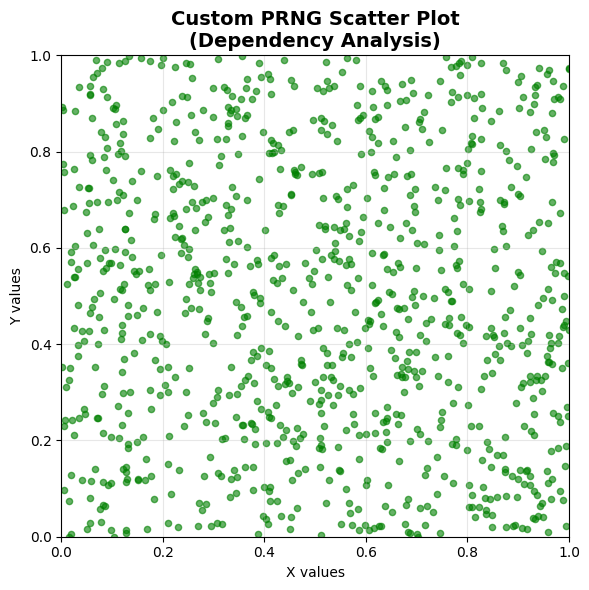

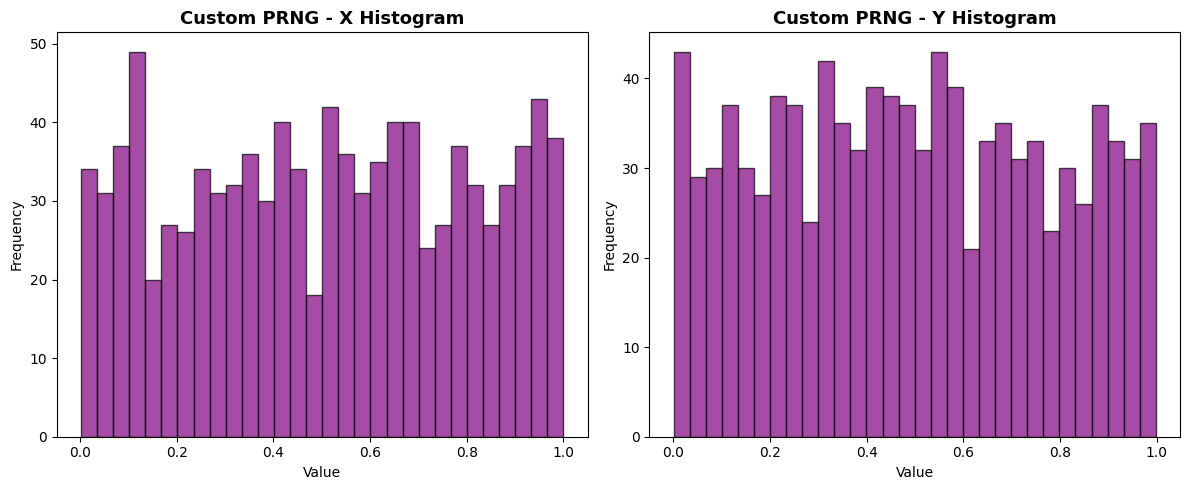

=== Custom PRNG Summary ===
Mean X: 0.5082, Std X: 0.2915
Mean Y: 0.4909, Std Y: 0.2863


In [2]:
import numpy as np
import matplotlib.pyplot as plt


class MyPRNG:
    def __init__(self, seed=2025, a=1103515245, c=12345, m=2**31):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m  # Normalize to [0,1)

    def generate_sequence(self, n):
        return np.array([self.next() for _ in range(n)])


n_points = 1000
prng = MyPRNG(seed=42)
x_vals = prng.generate_sequence(n_points)
y_vals = prng.generate_sequence(n_points)


plt.figure(figsize=(6,6))
plt.scatter(x_vals, y_vals, alpha=0.6, s=20, color='green')
plt.title('Custom PRNG Scatter Plot\n(Dependency Analysis)', fontsize=14, fontweight='bold')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True, alpha=0.3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('myprng_dependency.pdf')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(x_vals, bins=30, alpha=0.7, color='purple', edgecolor='black')
ax1.set_title('Custom PRNG - X Histogram', fontsize=13, fontweight='bold')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.hist(y_vals, bins=30, alpha=0.7, color='purple', edgecolor='black')
ax2.set_title('Custom PRNG - Y Histogram', fontsize=13, fontweight='bold')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('myprng_uniformity.pdf')
plt.show()


print("=== Custom PRNG Summary ===")
print(f"Mean X: {np.mean(x_vals):.4f}, Std X: {np.std(x_vals):.4f}")
print(f"Mean Y: {np.mean(y_vals):.4f}, Std Y: {np.std(y_vals):.4f}")
